In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 
import seaborn as sns



In [ ]:
data=pd.read_csv("insurance3r2.csv")
data.head()


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [ ]:
data=data.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


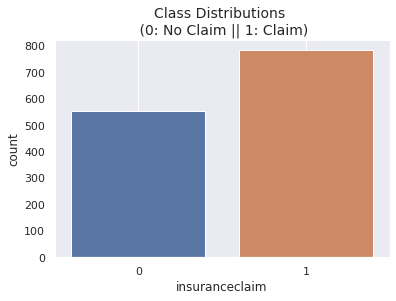

In [ ]:
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)
sns.set(style="darkgrid")
sns.countplot(data['insuranceclaim'])
plt.grid()
plt.show()


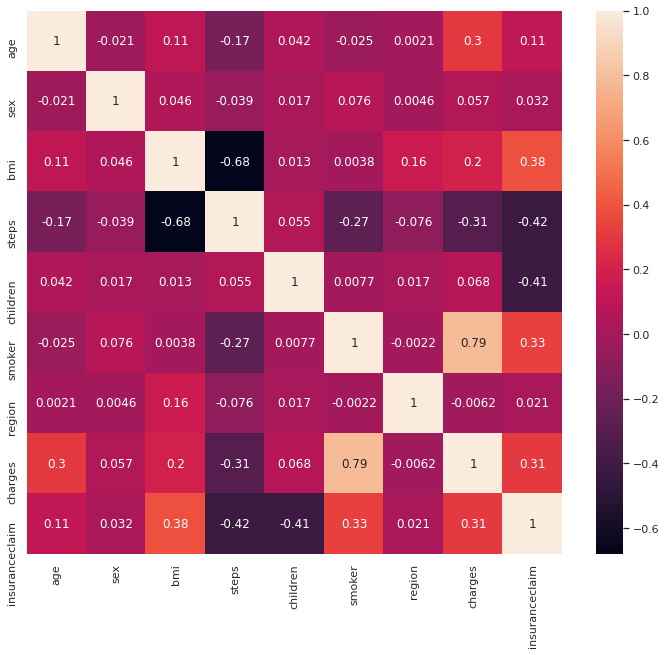

In [ ]:
#CORELATION
corr=data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

data=data.drop('region',axis=1)


Text(0.5, 1.0, 'Age vs Charges')

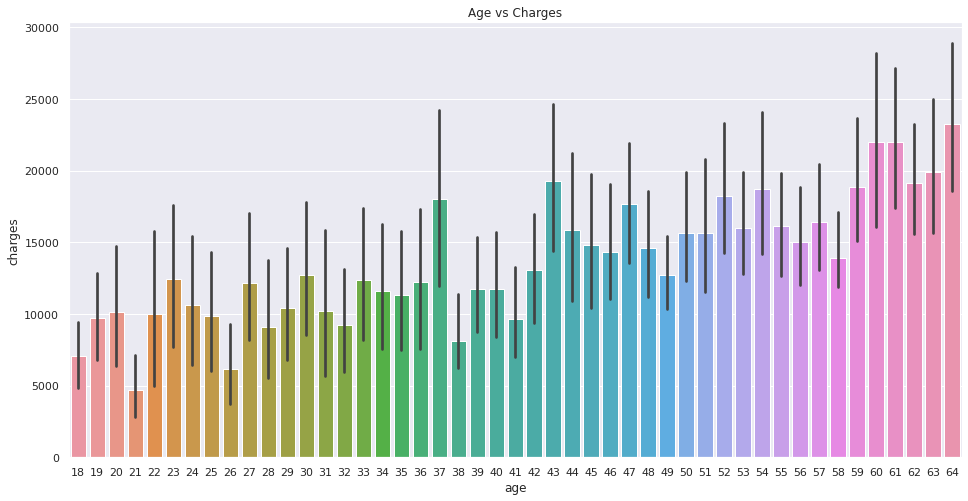

In [ ]:
#VISUALISATION
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")


Text(0.5, 1.0, 'smoker vs charges')

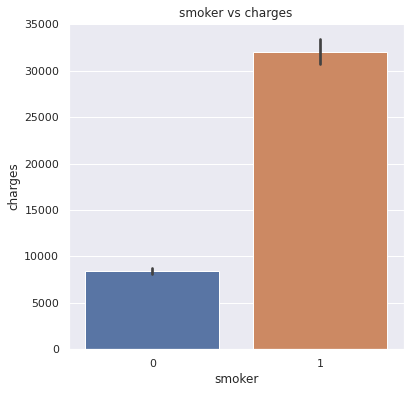

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)
plt.title('smoker vs charges')


Text(0.5, 1.0, 'children vs charges')

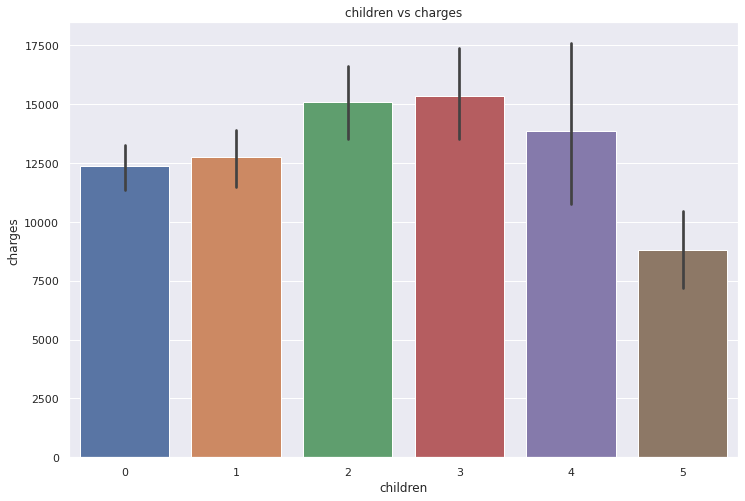

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'sex vs charges')

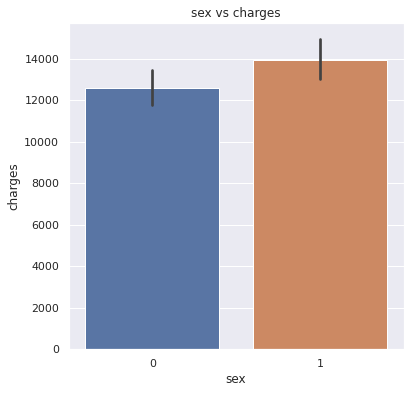

In [ ]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

In [ ]:
X = data.iloc[:,:-1]
y = data['insuranceclaim']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=10, criterion='entropy')
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_clf_predict = random_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
random_clf_cm = confusion_matrix(y_test,random_clf_predict)
random_clf_cm

array([[120,   3],
       [  2, 143]])

In [ ]:
from sklearn.metrics import classification_report
random_clf_report = classification_report(y_test,random_clf_predict)
print(random_clf_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.98      0.99      0.98       145

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268

